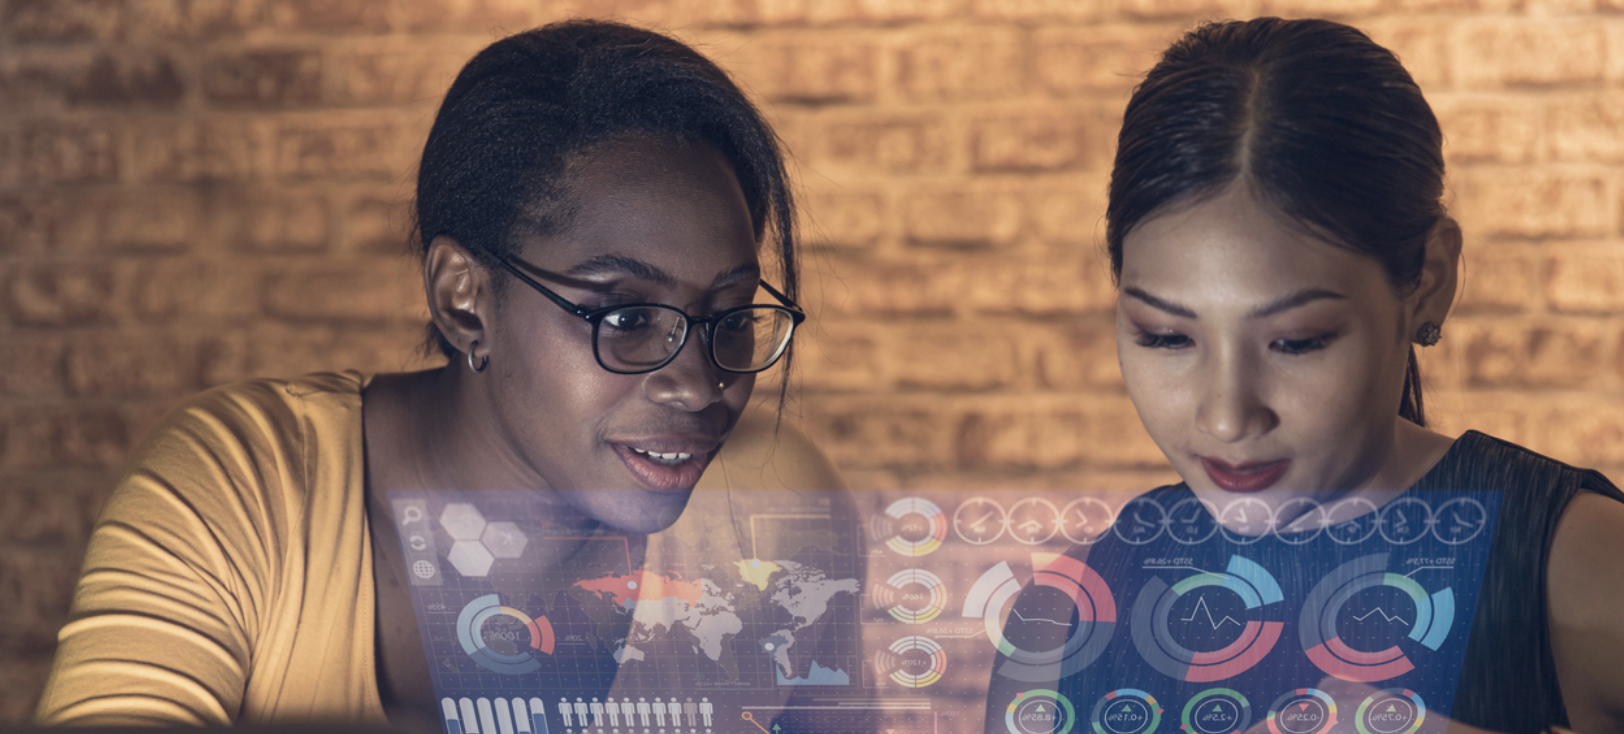

A common problem when creating models to generate business value from data is that the datasets can be so large that it can take days for the model to generate predictions. Ensuring that your dataset is stored as efficiently as possible is crucial for allowing these models to run on a more reasonable timescale without having to reduce the size of the dataset.

You've been hired by a major online data science training provider called *Training Data Ltd.* to clean up one of their largest customer datasets. This dataset will eventually be used to predict whether their students are looking for a new job or not, information that they will then use to direct them to prospective recruiters.

You've been given access to `customer_train.csv`, which is a subset of their entire customer dataset, so you can create a proof-of-concept of a much more efficient storage solution. The dataset contains anonymized student information, and whether they were looking for a new job or not during training:

| Column       | Description                                  |
|------------- |--------------------------------------------- |
| `student_id`   | A unique ID for each student.                 |
| `city`  | A code for the city the student lives in.  |
| `city_development_index` | A scaled development index for the city.       |
| `gender` | The student's gender.       |
| `relevant_experience` | An indicator of the student's work relevant experience.       |
| `enrolled_university` | The type of university course enrolled in (if any).       |
| `education_level` | The student's education level.       |
| `major_discipline` | The educational discipline of the student.       |
| `experience` | The student's total work experience (in years).       |
| `company_size` | The number of employees at the student's current employer.       |
| `last_new_job` | The number of years between the student's current and previous jobs.       |
| `training_hours` | The number of hours of training completed.       |
| `job_change` | An indicator of whether the student is looking for a new job (`1`) or not (`0`).       |

In [248]:
# Start your code here!
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [249]:
ds_jobs = pd.read_csv('/Users/dani/Data Science/Projects/DataCamp Projects/Customer Analytics: Preparing Data for Modeling/datasets/customer_train.csv')

In [250]:
ds_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_id              19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevant_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  job_change              19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [251]:
ds_jobs.memory_usage()

Index                        132
student_id                153264
city                      153264
city_development_index    153264
gender                    153264
relevant_experience       153264
enrolled_university       153264
education_level           153264
major_discipline          153264
experience                153264
company_size              153264
company_type              153264
last_new_job              153264
training_hours            153264
job_change                153264
dtype: int64

In [252]:
ds_jobs_clean = ds_jobs.copy()

In [253]:
ds_jobs_clean.sample(15)

,student_id,city,city_development_index,gender,relevant_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,job_change
10478,6539,city_21,0.624,NaN,Has relevant experience,no_enrollment,Graduate,STEM,1,1000-4999,Pvt Ltd,NaN,142,0
18034,800,city_162,0.767,Male,Has relevant experience,no_enrollment,Graduate,STEM,10,10-49,Pvt Ltd,3,21,0
14452,3251,city_123,0.738,Male,Has relevant experience,Full time course,Graduate,STEM,3,50-99,Pvt Ltd,never,40,0
15706,683,city_61,0.913,Male,Has relevant experience,no_enrollment,Graduate,STEM,12,50-99,Pvt Ltd,3,15,0
6692,3919,city_160,0.920,Male,No relevant experience,Full time course,Graduate,STEM,8,NaN,NaN,1,9,1
14586,29002,city_21,0.624,Male,Has relevant experience,no_enrollment,Masters,STEM,7,50-99,Pvt Ltd,never,73,1
18703,30337,city_21,0.624,Male,No relevant experience,Full time course,High School,NaN,3,NaN,NaN,never,151,1
862,19560,city_134,0.698,Male,No relevant experience,no_enrollment,Graduate,STEM,3,NaN,NaN,1,326,1
5049,4104,city_41,0.827,Male,Has relevant experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,>4,96,0
7656,13593,city_83,0.923,Male,Has relevant experience,Part time course,Graduate,STEM,>20,50-99,Pvt Ltd,1,12,0


In [254]:
# view into categories

display(ds_jobs_clean['company_size'].value_counts())

company_size
50-99        3083
100-499      2571
10000+       2019
10-49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: count, dtype: int64

In [255]:
# mapping of perceived ordinal categories

ordered_categories = {
    'relevant_experience':['No relevant experience', 'Has relevant experience '],
    'enrolled_university':['no_enrollment', 'Part time course', 'Full time course'],
    'education_level': ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd'],
    'experience': ['<1'] + (list(map(str, range(1,21)))) + ['>20'],
    'company_size': ['<10','10-49','50-99', '100-499', '500-999', '1000-4999', '5000-9999','10000+'],
    'last_new_job': ['never', '1', '2', '3', '4', '>4']
}

In [256]:
# dictionary value checks

display(ordered_categories.values())

dict_values([['No relevant experience', 'Has relevant experience '], ['no_enrollment', 'Part time course', 'Full time course'], ['Primary School', 'High School', 'Graduate', 'Masters', 'Phd'], ['<1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '>20'], ['<10', '10-49', '50-99', '100-499', '500-999', '1000-4999', '5000-9999', '10000+'], ['never', '1', '2', '3', '4', '>4']])

In [257]:
# creating a function to loop through categories to update accordingly

def category_fix(df, column, categories):
    for column in df:
        # Task 1: integer conversion
        if df[column].dtype == 'int':
            df[column] = df[column].astype('int32')

        # Task 2: float conversion
        elif df[column].dtype == 'float':
            df[column] = df[column].astype('float16')

        # Task 3/4: ordered category conversion
        elif column in categories.keys():
            category = pd.CategoricalDtype(categories[column], ordered=True) # ordered Series
            df[column] = df[column].astype(category) # conversion back to category dtype
            
        # Basecase
        else:
            df[column] = df[column].astype('category')

In [258]:
category_fix(ds_jobs_clean, ds_jobs_clean.columns, ordered_categories)

In [259]:
# checking order was performed correctly

ds_jobs_clean['experience'].cat.categories

Index(['<1', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '>20'],
      dtype='object')

In [260]:
# checking overall structure 

ds_jobs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   student_id              19158 non-null  int32   
 1   city                    19158 non-null  category
 2   city_development_index  19158 non-null  float16 
 3   gender                  14650 non-null  category
 4   relevant_experience     5366 non-null   category
 5   enrolled_university     18772 non-null  category
 6   education_level         18698 non-null  category
 7   major_discipline        16345 non-null  category
 8   experience              19093 non-null  category
 9   company_size            13220 non-null  category
 10  company_type            13018 non-null  category
 11  last_new_job            18735 non-null  category
 12  training_hours          19158 non-null  int32   
 13  job_change              19158 non-null  int32   
dtypes: category(10), float

In [261]:
# comparing memory usage to original dataframe

ds_jobs_clean.memory_usage()

Index                       132
student_id                76632
city                      24310
city_development_index    38316
gender                    19290
relevant_experience       19282
enrolled_university       19290
education_level           19370
major_discipline          19378
experience                19890
company_size              19522
company_type              19378
last_new_job              19378
training_hours            76632
job_change                76632
dtype: int64

In [262]:
# Task 5: data subset for more experienced professionals at enterprise companies
ds_jobs_clean = ds_jobs_clean.query('experience >= "10" & company_size >= "1000-4999"')

In [263]:
ds_jobs_clean.shape

(2201, 14)